## What are the most demanded skills for top 3 most popular data roles ?

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\91706\Data Analytics Practice\databases\python\Job_Data_Analysis.csv")

In [3]:
#Data Cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_skills=df.explode('job_skills')
df_skills[['job_title_short','job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,NaN
1,Data Analyst,r
1,Data Analyst,python
1,Data Analyst,sql
1,Data Analyst,nosql
...,...,...
785739,Data Engineer,kafka
785739,Data Engineer,kubernetes
785739,Data Engineer,docker
785740,Software Engineer,aws


In [5]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

In [6]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count=df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [7]:
job_titles=df_skills_count['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

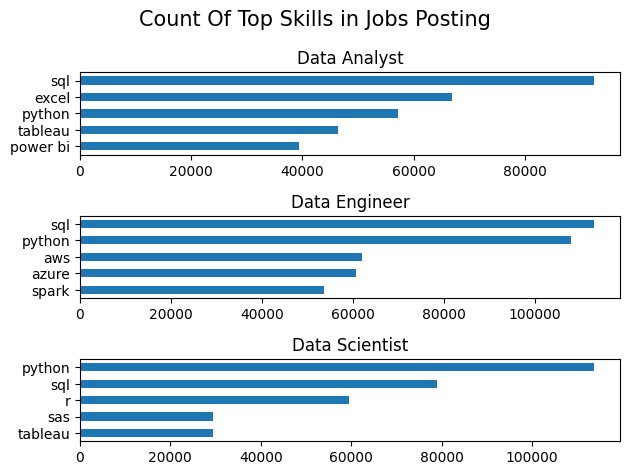

In [8]:
fig,ax=plt.subplots(len(job_titles),1)

for i,job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short'] == job_title].head()
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Count Of Top Skills in Jobs Posting',fontsize=15)
plt.tight_layout()
plt.show()

In [9]:
df_job_title_count=df['job_title_short'].value_counts().reset_index(name='job_total')
df_job_title_count

,job_title_short,job_total
0,Data Analyst,196075
1,Data Engineer,186241
2,Data Scientist,172286
3,Business Analyst,49063
4,Software Engineer,44929
5,Senior Data Engineer,44563
6,Senior Data Scientist,36957
7,Senior Data Analyst,29216
8,Machine Learning Engineer,14080
9,Cloud Engineer,12331


In [10]:
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [11]:
df_skill_perc=pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')
df_skill_perc['skill_percent']=(df_skill_perc['skill_count']/df_skill_perc['job_total'])*100
df_skill_perc

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,python,Data Scientist,113711,172286,66.001300
1,sql,Data Engineer,113130,186241,60.743875
2,python,Data Engineer,108022,186241,58.001192
3,sql,Data Analyst,92428,196075,47.139105
4,sql,Data Scientist,78982,172286,45.843539
...,...,...,...,...,...
2251,webex,Senior Data Scientist,1,36957,0.002706
2252,codecommit,Business Analyst,1,49063,0.002038
2253,xamarin,Machine Learning Engineer,1,14080,0.007102
2254,mlr,Machine Learning Engineer,1,14080,0.007102


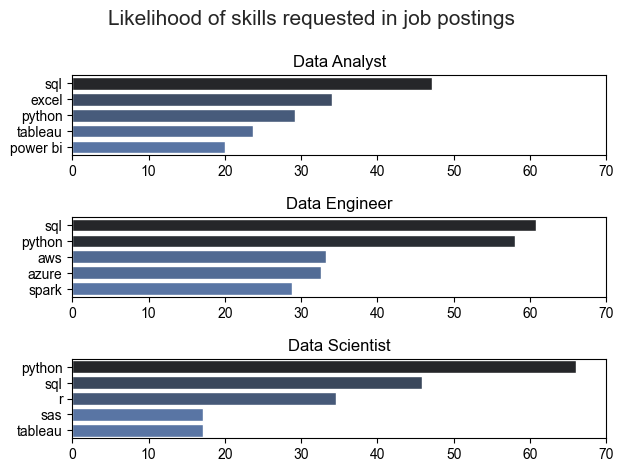

In [12]:
fig,ax=plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')

for i,job_title in enumerate(job_titles):
    df_plot=df_skill_perc[df_skill_perc['job_title_short'] == job_title].head()
    #df_plot.plot(kind='barh',x='job_skills',y='skill_percent',ax=ax[i],title=job_title)
    sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='skill_count',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,70)

fig.suptitle('Likelihood of skills requested in job postings',fontsize=15)
plt.tight_layout()
plt.show()

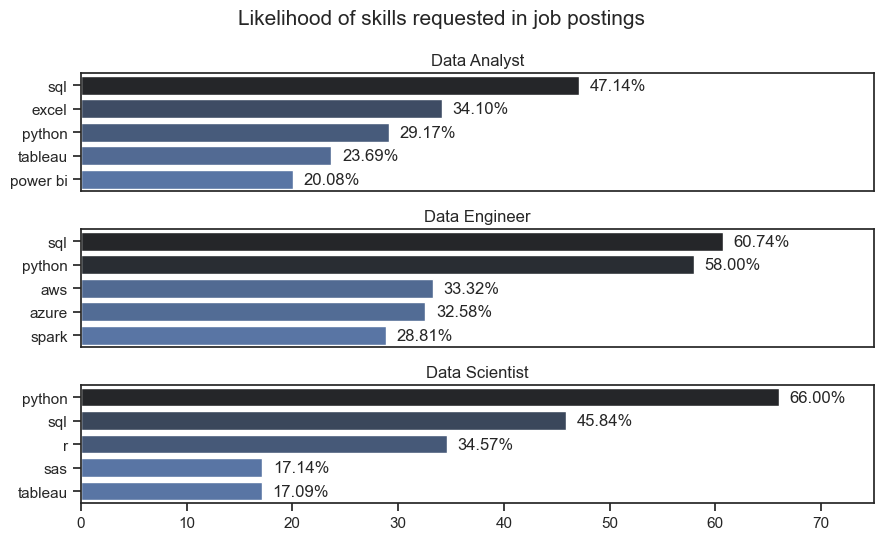

In [16]:
fig,ax=plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')
fig.set_size_inches((9,5.5))

for i,job_title in enumerate(job_titles):
    df_plot=df_skill_perc[df_skill_perc['job_title_short'] == job_title].head()
    sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='skill_count',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,75)
    
    for n,v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1,n,f'{v:.2f}%',va='center')

    if i!=len(job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of skills requested in job postings',fontsize=15)
plt.tight_layout()
plt.show()